<a href="https://colab.research.google.com/github/patrick-3008/Object-Recognition-in-Images/blob/main/CIFAR_10_Object_Recognition_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Dataset

In [6]:
!pip install kaggle py7zr

In [7]:
# YOU MUST UPLOAD KAGGLE.JSON FILE


# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# daatset api
!kaggle competitions download -c cifar-10

 98% 703M/715M [00:03<00:00, 156MB/s]
100% 715M/715M [00:03<00:00, 206MB/s]


In [9]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [10]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [12]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [13]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


# Data Preprocessing

In [14]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [15]:
filenames = os.listdir('/content/train')
print(type(filenames))
print(len(filenames))

<class 'list'>
50000


In [16]:
print(filenames[0:5]) # first 5 files
print(filenames[-5:]) # last 5 files

['8125.png', '33343.png', '4078.png', '29182.png', '8738.png']
['9615.png', '7162.png', '1056.png', '38453.png', '40492.png']


In [17]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [18]:
labels_df.shape

(50000, 2)

In [19]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [20]:
labels_df['label'].value_counts() # the classes

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [21]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [22]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


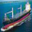

In [23]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/796.png')
cv2_imshow(img)

In [24]:
id_list = list(labels_df['id'])
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [25]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [26]:
print(type(data))
print(len(data))
print(data[0].shape)
print(data[0])

<class 'list'>
50000
(32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [27]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [28]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


# Training

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [31]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [32]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.2226 - loss: 2.0911 - val_acc: 0.3198 - val_loss: 1.8639
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3105 - loss: 1.8887 - val_acc: 0.3307 - val_loss: 1.8293
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.3320 - loss: 1.8460 - val_acc: 0.3360 - val_loss: 1.8285
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3363 - loss: 1.8228 - val_acc: 0.3565 - val_loss: 1.7974
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.3475 - loss: 1.8014 - val_acc: 0.3052 - val_loss: 1.9022
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.3444 - loss: 1.8032 - val_acc: 0.3430 - val_loss: 1.8695
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.3529 - loss: 1.7915 - val_acc: 0.3575 - val_loss: 1.7859
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.3567 - loss: 1.7828 - val_acc: 0.3487 - val_loss: 1.7732
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

# ResNet50

In [37]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [38]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3)) # transfer learning
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [39]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2))) # 32x32 -> 64x64
model.add(layers.UpSampling2D((2,2))) # 64x64 -> 128x128
model.add(layers.UpSampling2D((2,2))) # 128x128 -> 256x256
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [40]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [41]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 466s 364ms/step - acc: 0.3320 - loss: 2.0434 - val_acc: 0.7300 - val_loss: 0.9746
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 466s 363ms/step - acc: 0.6827 - loss: 1.0444 - val_acc: 0.8963 - val_loss: 0.4511
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 400s 355ms/step - acc: 0.7991 - loss: 0.7463 - val_acc: 0.9175 - val_loss: 0.3442
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 450s 363ms/step - acc: 0.8625 - loss: 0.5722 - val_acc: 0.9275 - val_loss: 0.3010
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 434s 355ms/step - acc: 0.9058 - loss: 0.4450 - val_acc: 0.9337 - val_loss: 0.2410
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 451s 363ms/step - acc: 0.9318 - loss: 0.3515 - val_acc: 0.9390 - val_loss: 0.2408
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 364ms/step - acc: 0.9519 - loss: 0.2819 - val_acc: 0.9408 - val_loss: 0.2198
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 434s 357ms/step - acc: 0.9602 - loss: 0.2344 - val_acc: 0.9390 - val_loss: 0.2316
Epoch 9/

In [42]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - acc: 0.9361 - loss: 0.2338
Test Accuracy = 0.9365000128746033


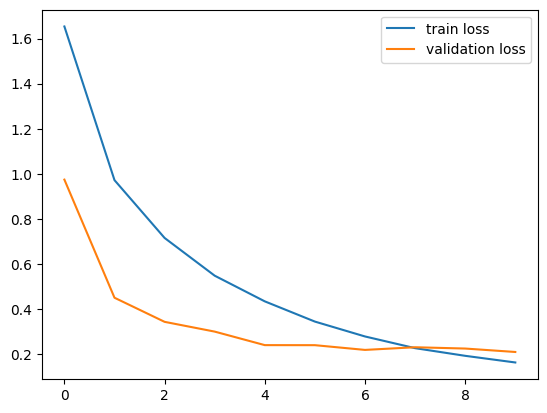

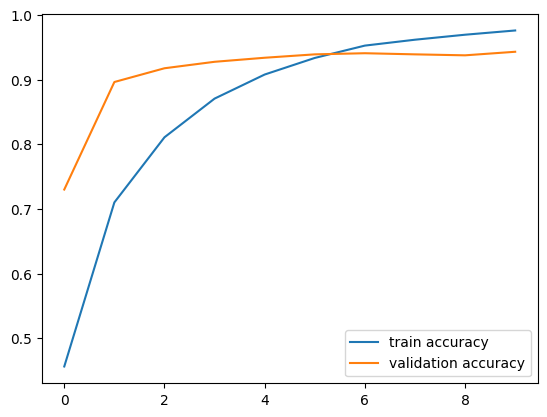

In [43]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# Testing

In [93]:
image_path = '/content/truck.webp'
image = Image.open(image_path)
# Resize to 32x32 to match the expected input of the upsampling layers
image = image.resize((32, 32))
image_array = np.array(image)
image_array = np.expand_dims(image_array, axis=0)
image_scaled = image_array / 255
print(image_scaled.shape)

(1, 32, 32, 3)


In [94]:
prediction = model.predict(image_scaled)
predicted_class_index = np.argmax(prediction)

print("Prediction probabilities:", prediction)
print("Predicted class index:", predicted_class_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction probabilities: [[0.07213334 0.03141729 0.17149788 0.02187489 0.06653622 0.06304233
  0.14854307 0.10435278 0.0597191  0.26088315]]
Predicted class index: 9


Predicted class: truck


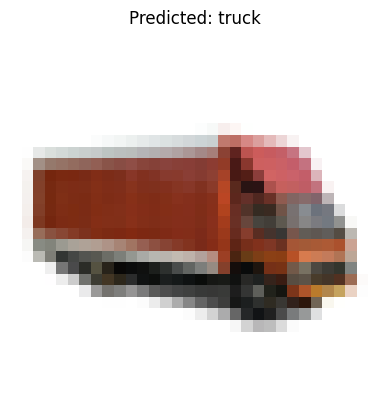

In [95]:
# Interpret the predicted class index using the labels_dictionary
# Reverse the dictionary to map index to label
index_to_label = {v: k for k, v in labels_dictionary.items()}
predicted_label = index_to_label[predicted_class_index]

print(f"Predicted class: {predicted_label}")

# Display the image
plt.imshow(image)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()